In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
#Cargamos los datos.
data = pd.read_csv('AirPassengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [3]:
#Normalizamos los datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Passengers']])

In [4]:
from collections.abc import Sequence
# Definimos las secuencias de entrada para LSTM
def create_sequences(data, sequence_length=12):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)
sequence_length = 12
X, y = create_sequences(data_scaled, sequence_length)

In [5]:
#Divimos los datos para su entrenamiento.
train_size=int(len(X)*0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]
#Cargamos el modelo que utilizaremos, el cual sera LSTM y lo optimizaremos con ADAM.
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#Entrenamos el modelo para 50 epocas
history=model.fit(X_train,y_train,epochs=200,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step - loss: 0.0862 - val_loss: 0.2510
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0622 - val_loss: 0.1773
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0379 - val_loss: 0.1094
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0234 - val_loss: 0.0544
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0108 - val_loss: 0.0247
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0139 - val_loss: 0.0217
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0189 - val_loss: 0.0221
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0193 - val_loss: 0.0212
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0140 - val_loss: 0.0251
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0101 - val_loss: 0.0341
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0104 - val_loss: 0.0434
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0106 - 

In [9]:
#Calculamos la prediccion
y_pred=model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


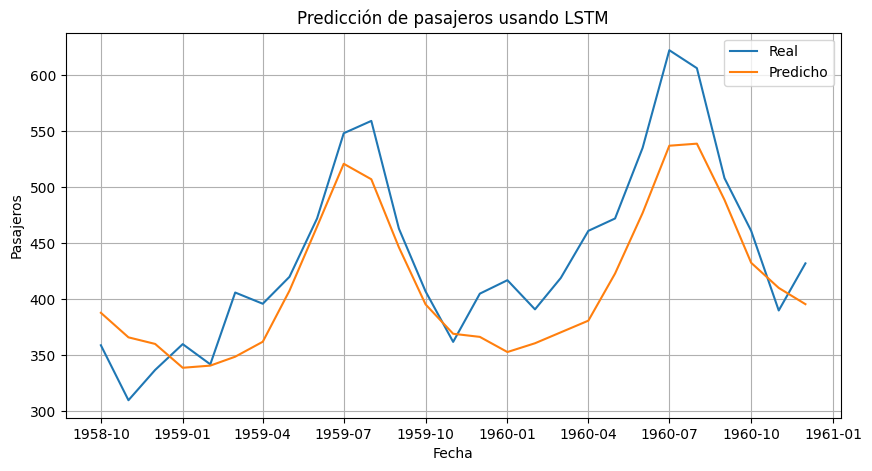

In [10]:
#Visualizaremos los resultados con ayuda de las graficas.
plt.figure(figsize=(10,5))
plt.plot(data.index[-len(y_test):], y_test_inv, label='Real')
plt.plot(data.index[-len(y_test):], y_pred_inv, label='Predicho')
plt.title('Predicción de pasajeros usando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.grid(True)
plt.show()